In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import math

In [3]:
#Concatenamos varis dataframe em um só #
def get(tickers, startdata, enddate):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start=startdata, end=enddate)
    datas = map (data,tickers) 
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [4]:
tickers = ['EQTL3.SA']
data = get(tickers,  datetime.datetime(2020,1,1), datetime.datetime(2021,1,1))

In [5]:
def percet (daily_close_all): # daily_close  #
    daily_pct_chance = (daily_close_all / daily_close_all.shift(1) - 1) # Pega os dias de hoje e divide por os de ontem que nos da a variação # 
    daily_pct_chance.fillna(0,inplace=True) # subtitui os valores de NaN por zero #
    return daily_pct_chance

In [6]:
def vol(daily_pct, period): #percentil por dia # # Periodo #
    volatility = daily_pct.rolling(period).std() * np.sqrt(period) #rola a variação aplicando o periodo ai aplicando std () vezes a raiz do periodo#
    volatility.fillna(0,inplace=True)
    return volatility

In [7]:
def poisson(x , lb):
    poss = ((lb ** x) * (math.exp(1)**-lb))/ math.factorial(int(x))
    return poss

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('EQTL3.SA', Timestamp('2020-01-02 00:00:00')) to ('EQTL3.SA', Timestamp('2020-12-30 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       247 non-null    float64
 1   Low        247 non-null    float64
 2   Open       247 non-null    float64
 3   Close      247 non-null    float64
 4   Volume     247 non-null    float64
 5   Adj Close  247 non-null    float64
dtypes: float64(6)
memory usage: 14.5+ KB


In [9]:
data_pct = percet(data.Close)

In [10]:
data_close = data.Close

In [11]:
period = 5
data_vol = data_pct.rolling(period).std() * np.sqrt(period)
data_vol

Ticker    Date      
EQTL3.SA  2020-01-02         NaN
          2020-01-03         NaN
          2020-01-06         NaN
          2020-01-07         NaN
          2020-01-08    0.015872
                          ...   
          2020-12-22    0.045356
          2020-12-23    0.045327
          2020-12-28    0.045890
          2020-12-29    0.045569
          2020-12-30    0.022148
Name: Close, Length: 247, dtype: float64

In [12]:
data_pct.head()

Ticker    Date      
EQTL3.SA  2020-01-02    0.000000
          2020-01-03   -0.011890
          2020-01-06    0.001289
          2020-01-07   -0.005150
          2020-01-08    0.006902
Name: Close, dtype: float64

In [13]:
data_vol = vol(data_pct,2)
data_vol

Ticker    Date      
EQTL3.SA  2020-01-02    0.000000
          2020-01-03    0.011890
          2020-01-06    0.013179
          2020-01-07    0.006439
          2020-01-08    0.012053
                          ...   
          2020-12-22    0.051734
          2020-12-23    0.019847
          2020-12-28    0.015438
          2020-12-29    0.018925
          2020-12-30    0.010437
Name: Close, Length: 247, dtype: float64

In [14]:
def poi(data_pct, lb):    
    data_poisson = []
    for i in range(len(data_pct)):
        data_poisson.append(((lb ** data_pct[i] * np.exp(-1.0 * lb)) / math.factorial(int(data_pct[i]))))
    return pd.DataFrame(data_poisson)

In [15]:
a =  poi(data_pct, data_pct.mean())
p = poi(data.Close, data.Close.mean())
volatility = poi(data_vol, data_vol.mean())

In [16]:
data['PCT'] = data_pct
data['Close_Poisson'] = p
data['Volatility'] = volatility

In [17]:
data['Volatility'] = data_vol

In [18]:
data

High        Low       Open      Close     Volume  \
Ticker   Date                                                                
EQTL3.SA 2020-01-02  23.610001  22.850000  22.879999  23.549999  4940300.0   
         2020-01-03  23.680000  23.049999  23.299999  23.270000  4514100.0   
         2020-01-06  23.590000  22.940001  23.180000  23.299999  4680500.0   
         2020-01-07  23.389999  22.910000  23.330000  23.180000  4821300.0   
         2020-01-08  23.340000  22.750000  23.280001  23.340000  4500500.0   
...                        ...        ...        ...        ...        ...   
         2020-12-22  22.740000  22.090000  22.209999  22.650000  4487400.0   
         2020-12-23  23.139999  22.650000  22.709999  22.670000  4866100.0   
         2020-12-28  23.100000  22.650000  22.879999  23.040001  3614100.0   
         2020-12-29  23.120001  22.740000  23.110001  22.980000  4105400.0   
         2020-12-30  23.440001  22.920000  22.990000  23.160000  7334800.0   

                     Adj Close       PCT  Close_Poisson  Volatility  
Ticker   Date                                                        
EQTL3.SA 2020-01-02  22.283354  0.000000            NaN    0.000000  
         2020-01-03  22.018414 -0.011890            NaN    0.011890  
         2020-01-06  22.046801  0.001289            NaN    0.013179  
         2020-01-07  21.933256 -0.005150            NaN    0.006439  
         2020-01-08  22.084650  0.006902            NaN    0.012053  
...                        ...       ...            ...         ...  
         2020-12-22  21.998722  0.020730            NaN    0.051734  
         2020-12-23  22.018147  0.000883            NaN    0.019847  
         2020-12-28  22.377508  0.016321            NaN    0.015438  
         2020-12-29  22.319233 -0.002604            NaN    0.018925  
         2020-12-30  22.494057  0.007833            NaN    0.010437  

[247 rows x 9 columns]

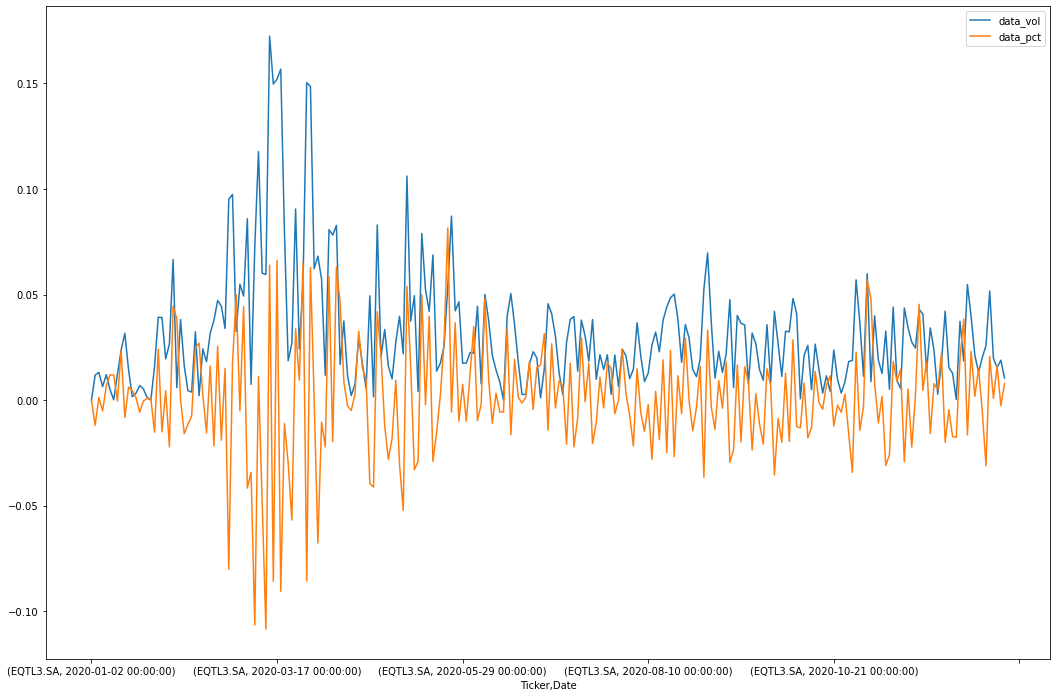

In [19]:

data.Volatility.plot(figsize=(18,12), label='data_vol')
data.PCT.plot( label='data_pct')
plt.legend()
plt.show()